In [0]:
# !unzip 1551.zip
# ! rm -r __MACOSX
# ! rm -r 1551.zip

In [0]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook

# Get Data

In [0]:
data = '1551/' 

class parse:
    def __init__(self):
        self.documents = []
        self.state = "empty"
        self.current = {}
    
    def process_line(self, line, category):
        if line.strip().isnumeric():
            self.state = "id"
            self.current['id'] = line.strip().lower()
        elif self.state == "id" or (self.state == 'text' and line != '\n'):
            self.state = 'text'
            current_text = self.current.get("text", "")
            self.current['text'] = current_text + line.lower().replace("\n", " ")
        elif line == '\n' and self.state != 'newline':
            self.state = 'newline'
        elif line == '\n' and self.state == 'newline':
            self.state = "empty"
            self.current['category'] = category
            self.documents.append(self.current)
            self.current = {}
parser = parse()

def processfile(path, file_name):
  ids = []
  texts = []
  with open(path + file_name) as f:
    lines = f.readlines()
    for line in lines:
      parser.process_line(line, file_name.split('.')[0])
        
for file in  os.listdir(data):
  processfile(data, file)
  
data = pd.DataFrame(parser.documents).dropna(axis=0)

In [51]:
data.head()

,category,id,text
0,Інші-Подяки,3179399,"дякую за вивезене сміття, яке накопичувалось з..."
1,Інші-Подяки,3160026,спасибо! воду включили. приношу свою благодарн...
2,Інші-Подяки,3158026,спасибо кровельщикам володе и руслану за добро...
3,Інші-Подяки,3141706,"огромное спасибо, за то что началась работа по..."
4,Інші-Подяки,2782837,кого цілувати не знаю. у 14 годин 20 хвилин по...


In [61]:
data.groupby('category').count()

,id,text
category,,
Інші-Подяки,515,515
Інші-технічні-недоліки-стану-ліфту,1450,1450
Аварійний--травмонебезпечний-стан-утримання-об-єктів-благоустрою,450,450
Бажаючі-отримати--Картки-киянина--КК--,114,114
Будівництво--дооблаштування-спортивних-майданчиків,162,162
Будівництво-АЗС,149,149
Будівництво-в-нічний-час,112,112
Будівництво-дооблаштування-дитячого-майданчику,1132,1132
Будівництво-та-реконструкція-об-єктів-освіти,160,160


# Gent embedings

In [52]:
!wget http://lang.org.ua/static/downloads/models/news.lowercased.tokenized.word2vec.300d.bz2
! bzip2 -d news.lowercased.tokenized.word2vec.300d.bz2

--2019-07-28 11:23:06--  http://lang.org.ua/static/downloads/models/news.lowercased.tokenized.word2vec.300d.bz2
Resolving lang.org.ua (lang.org.ua)... 95.216.74.77
Connecting to lang.org.ua (lang.org.ua)|95.216.74.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310107678 (296M) [application/octet-stream]
Saving to: ‘news.lowercased.tokenized.word2vec.300d.bz2’

news.lowercased.tok 100%[===================>] 295.74M  17.2MB/s    in 19s     

2019-07-28 11:23:26 (15.7 MB/s) - ‘news.lowercased.tokenized.word2vec.300d.bz2’ saved [310107678/310107678]



In [53]:
from gensim.models import Word2Vec
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format("news.lowercased.tokenized.word2vec.300d")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Create features and targets

In [0]:
count_target_labels = len(set(data['category'].values))
filename2num = dict(zip(set(data['category'].values), range(count_target_labels)))

In [0]:
data['target'] = [filename2num[name] for name in data['category'].tolist()]

In [0]:
def sentence2vec(sentence):
  words = sentence.split(' ')
  words = [w.replace('.', '') for w in words]
  words = [w.replace(',', '') for w in words]
  words = [w.replace('?', '') for w in words]
  words = [w.replace('!', '') for w in words]
  words = [w.replace('...', '') for w in words]
  vec = np.array([np.array(model[w]) for w in words if w in model]).sum(axis=0)
  
  # print(vec.shape)
  if vec.size == 0:
    # print(sentence)
    return np.random.rand(300)
  
  if (vec.shape != (300,)):
    return np.random.rand(300)
#     print(vec, vec.shape, vec.size)
  return vec 

In [0]:
vectors = np.array([sentence2vec(sent) for sent in data['text'].tolist()])
target = np.array(data['target'])

In [205]:
vectors.shape, target.shape

((114724, 300), (114724,))

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.30, random_state=1244)

In [207]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80306, 300), (34418, 300), (80306,), (34418,))

##  1. У якості безйлайну використайте класифікатор kNN, який буде шукати найближчі за косинусною відстанню вектори запитів, утворені сумуванням векторів всіх слів запиту.

In [209]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1, metric='cosine')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 829h O_o

In [215]:
res = []
for x in tqdm(X_test):
  predicted = knn.predict(X_test)
  res.append(predicted)

  0%|          | 4/34418 [05:47<829:19:09, 86.75s/it]

KeyboardInterrupt: ignored

In [218]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(1, n_jobs=-1, metric='cosine')
knn.fit(X_train, y_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=1, p=2, radius=1.0)

In [0]:
y_pred = np.array(y_train)[neigh.kneighbors(X_test, 1, return_distance=False)].reshape(-1)

In [227]:
from sklearn.metrics import f1_score
f1_baseline_result = f1_score(y_pred, y_test, average='weighted')
print(f'f1-score result of knn: {f1_baseline_result}')

f1-score result of knn: 0.3276459523646002


## 2. Розробіть покращений класифікатор, для якого використайте іншу модель класифікації, яка би присвоювала ваги окремим елементам вектора (наприклад, Logistic Regression, SVM, Random Forest). Також можете зробити додаткові покращення, такі як:

- здійснювати попередню фільтрацію і відбирати тільки частину векторів для представлення

- використовувати лематизацію та інші форми нормалізації

- робити зваження векторів

- додатково використовувати інші способи побудувати вектор документу (наприклад, TF-IDF, LDA, ...)

### Remove stopwords

In [228]:
!wget https://raw.githubusercontent.com/elastic/hunspell/master/src/resources/org/elasticsearch/analysis/hunspell/uk/stopwords.txt

--2019-07-28 14:38:00--  https://raw.githubusercontent.com/elastic/hunspell/master/src/resources/org/elasticsearch/analysis/hunspell/uk/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1550 (1.5K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   1.51K  --.-KB/s    in 0s      

2019-07-28 14:38:00 (285 MB/s) - ‘stopwords.txt’ saved [1550/1550]



In [0]:
with open('stopwords.txt') as f:
  stopwords = f.read().split('\n')[1:]

In [0]:
def sentence2vec2(sentence):
  words = sentence.split(' ')
  words = [w.replace('.', '') for w in words]
  words = [w.replace(',', '') for w in words]
  words = [w.replace('?', '') for w in words]
  words = [w.replace('!', '') for w in words]
  words = [w.replace('...', '') for w in words]
  words = [w for w in words if w not in stopwords]
  vec = np.array([np.array(model[w]) for w in words if w in model]).sum(axis=0)
  
  # print(vec.shape)
  if vec.size == 0:
    # print(sentence)
    return np.random.rand(300)
  
  if (vec.shape != (300,)):
    return np.random.rand(300)
#     print(vec, vec.shape, vec.size)
  return vec 

In [0]:
vectors = np.array([sentence2vec2(sent) for sent in data['text'].tolist()])
target = np.array(data['target'])

In [240]:
vectors.shape, target.shape

((114724, 300), (114724,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.30, random_state=1244)

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

logreg = SGDClassifier(loss='log', alpha=0.00001, penalty='l1', max_iter=25, random_state=123, n_jobs=10, verbose=0)
rf = RandomForestClassifier(max_depth=4, n_estimators=50, max_features=25,  random_state=123, n_jobs=10)
# ab = AdaBoostClassifier()
# svm = SVC(gamma=2, C=1)

models = [logreg, rf]#, ab, svm]
# model_names = ['Logistic', 'Forest', 'Boosting', 'SVM']
model_names = ['Logistic', 'Forest']

In [271]:
from sklearn.metrics import f1_score
results = []
for idx, model in enumerate(models):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1_sc = f1_score(y_pred, y_test, average='weighted')
  print(f'f1-score result of {model_names[idx]}: {f1_sc}')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


f1-score result of Logistic: 0.30157754249550667
f1-score result of Forest: 0.2470947914217976


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### f1-score result of LogisticRegression: 0.30157754249550667
### f1-score result of RandomForest: 0.2470947914217976

# Add weights TF-IDF

In [0]:
import collections

def compute_tf(text):
    tf_text = collections.Counter(text)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(text))

    return tf_text

In [0]:
def compute_idf(word, corpus):
  return np.log(len(corpus)/sum([1.0 for i in corpus if word in i]))

In [0]:

def sentence2vec3(words, corpus):
  vec = np.array([compute_tf(text)[w] * compute_idf(w, corpus) * np.array(model[w]) for w in words if w in model]).sum(axis=0)
  if vec.size == 0:
    return np.random.rand(300)
  
  if (vec.shape != (300,)):
    return np.random.rand(300)
  return vec 

In [0]:
def get_words(DATA):
  corpus = []
  for sentence in DATA:
    words = sentence.split(' ')
    words = [w.replace('.', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace('...', '') for w in words]
    words = [w for w in words if w not in stopwords]
    corpus.append(words)
  return corpus

In [0]:
corpus = get_words(data['text'].tolist())
vectors = np.array([sentence2vec3(sent, corpus) for sent in corpus])
target = np.array(data['target'])

In [283]:
vectors.shape, target.shape

((114724, 300), (114724,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.30, random_state=1244)

In [0]:
logreg = SGDClassifier(loss='log', alpha=0.00001, penalty='l1', max_iter=40, random_state=123, n_jobs=10, verbose=0)
rf = RandomForestClassifier(max_depth=4, n_estimators=50, max_features=40,  random_state=123, n_jobs=10)

models = [logreg, rf]
model_names = ['Logistic', 'Forest']

In [287]:
results = []
for idx, model in enumerate(models):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1_sc = f1_score(y_pred, y_test, average='weighted')
  print(f'f1-score result of {model_names[idx]}: {f1_sc}')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


f1-score result of Logistic: 0.14432135660409157
f1-score result of Forest: 0.20888842631140717


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### f1-score result of LogisticRegression: 0.14432135660409157
### f1-score result of RandomForest: 0.20888842631140717

# Use only TF


In [0]:
def sentence2vec4(words):
  vec = np.array([compute_tf(text)[w] * np.array(model[w]) for w in words if w in model]).sum(axis=0)
  if vec.size == 0:
    return np.random.rand(300)
  
  if (vec.shape != (300,)):
    return np.random.rand(300)
  return vec 

In [0]:
corpus = get_words(data['text'].tolist())
vectors = np.array([sentence2vec4(sent) for sent in corpus])
target = np.array(data['target'])

In [291]:
vectors.shape, target.shape

((114724, 300), (114724,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.30, random_state=1244)

In [0]:
logreg = SGDClassifier(loss='log', alpha=0.00001, penalty='l1', max_iter=40, random_state=123, n_jobs=10, verbose=0)
rf = RandomForestClassifier(max_depth=4, n_estimators=50, max_features=40,  random_state=123, n_jobs=10)

models = [logreg, rf]
model_names = ['Logistic', 'Forest']

In [294]:
results = []
for idx, model in enumerate(models):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1_sc = f1_score(y_pred, y_test, average='weighted')
  print(f'f1-score result of {model_names[idx]}: {f1_sc}') 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


f1-score result of Logistic: 0.03932536175297439
f1-score result of Forest: 0.20888842631140717


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### f1-score result of LogisticRegression: 0.03932536175297439
### f1-score result of RandomForest: 0.20888842631140717

# NN

In [0]:
vectors = np.array([sentence2vec(sent) for sent in data['text'].tolist()])
target = np.array(data['target'])

In [296]:
vectors.shape, target.shape

((114724, 300), (114724,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vectors, target, test_size=0.30, random_state=1244)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
# len(set(y_train)), len(set(y_test)), 

In [309]:
X_train.shape[1:]

(300,)

In [0]:
num_classes = len(set(y_train))

input = Input(shape=X_train.shape[1:])
x = Dense(420, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(input, x)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [0]:
size_target = y_train.shape[0], len(set(y_train))

y_train_nn = np.zeros(size_target)
for idx, elem in enumerate(y_train):
  y_train_nn[idx, elem] = 1

In [352]:
history = model.fit(X_train, y_train_nn, validation_split=0.3, batch_size=64, epochs=50, verbose=1)

Train on 56214 samples, validate on 24092 samples
Epoch 1/50
56214/56214 [==============================] - 8s 147us/step - loss: 4.4215 - acc: 0.1159 - val_loss: 4.4303 - val_acc: 0.1139
Epoch 2/50
56214/56214 [==============================] - 8s 146us/step - loss: 4.4214 - acc: 0.1159 - val_loss: 4.4311 - val_acc: 0.1139
Epoch 3/50
56214/56214 [==============================] - 8s 144us/step - loss: 4.4215 - acc: 0.1159 - val_loss: 4.4317 - val_acc: 0.1139
Epoch 4/50
56214/56214 [==============================] - 8s 141us/step - loss: 4.4217 - acc: 0.1159 - val_loss: 4.4312 - val_acc: 0.1139
Epoch 5/50
56214/56214 [==============================] - 8s 142us/step - loss: 4.4217 - acc: 0.1159 - val_loss: 4.4316 - val_acc: 0.1139
Epoch 6/50
56214/56214 [==============================] - 8s 145us/step - loss: 4.4216 - acc: 0.1159 - val_loss: 4.4317 - val_acc: 0.1139
Epoch 7/50
56214/56214 [==============================] - 8s 141us/step - loss: 4.4215 - acc: 0.1159 - val_loss: 4.4314 - 

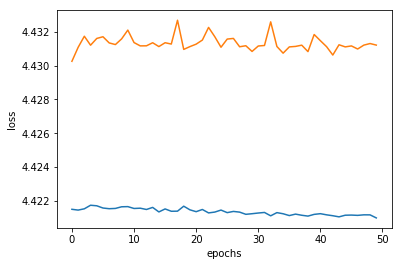

In [353]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
y_pred = model.predict(X_test).argmax(axis=1)

In [357]:
f1_sc = f1_score(y_pred, y_test, average='weighted')
print(f'f1-score result of NN: {f1_sc}')

f1-score result of NN: 0.20888842631140717


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### f1-score result of NN: 0.20888842631140717

In [0]:
num_classes = len(set(y_train))

input = Input(shape=X_train.shape[1:])
x = Dense(64, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(input, x)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [359]:
history = model.fit(X_train, y_train_nn, validation_split=0.3, batch_size=64, epochs=50, verbose=1)

Train on 56214 samples, validate on 24092 samples
Epoch 1/50
56214/56214 [==============================] - 3s 48us/step - loss: 4.5542 - acc: 0.1082 - val_loss: 4.4697 - val_acc: 0.1139
Epoch 2/50
56214/56214 [==============================] - 2s 42us/step - loss: 4.4662 - acc: 0.1159 - val_loss: 4.4435 - val_acc: 0.1139
Epoch 3/50
56214/56214 [==============================] - 2s 42us/step - loss: 4.4443 - acc: 0.1159 - val_loss: 4.4319 - val_acc: 0.1139
Epoch 4/50
56214/56214 [==============================] - 2s 41us/step - loss: 4.4360 - acc: 0.1159 - val_loss: 4.4323 - val_acc: 0.1139
Epoch 5/50
56214/56214 [==============================] - 2s 41us/step - loss: 4.4337 - acc: 0.1159 - val_loss: 4.4325 - val_acc: 0.1139
Epoch 6/50
56214/56214 [==============================] - 2s 42us/step - loss: 4.4341 - acc: 0.1159 - val_loss: 4.4326 - val_acc: 0.1139
Epoch 7/50
56214/56214 [==============================] - 2s 41us/step - loss: 4.4322 - acc: 0.1159 - val_loss: 4.4318 - val_acc

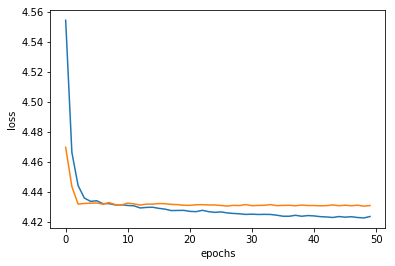

In [360]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [361]:
y_pred = model.predict(X_test).argmax(axis=1)
f1_sc = f1_score(y_pred, y_test, average='weighted')
print(f'f1-score result of NN: {f1_sc}')

f1-score result of NN: 0.20888842631140717


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
